In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
np.random.seed(42)

In [3]:
# Veri setini yükleyelim
df = pd.read_csv('data.csv')

In [4]:
print("Veri seti boyutu:", df.shape)
df.head()

Veri seti boyutu: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
print("\nEksik veri sayısı:")
print(df.isnull().sum())


Eksik veri sayısı:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_w

In [8]:
print("\nSınıf dağılımı:")
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)
print(f"İyi huylu (B) yüzdesi: {diagnosis_counts['B']/len(df)*100:.2f}%")
print(f"Kötü huylu (M) yüzdesi: {diagnosis_counts['M']/len(df)*100:.2f}%")


Sınıf dağılımı:
diagnosis
B    357
M    212
Name: count, dtype: int64
İyi huylu (B) yüzdesi: 62.74%
Kötü huylu (M) yüzdesi: 37.26%


C:\Users\sedtt\AppData\Local\Temp\ipykernel_11824\193696810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


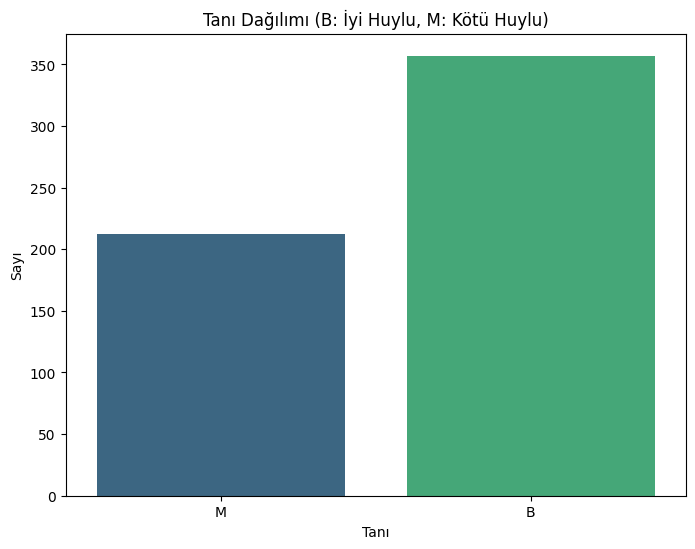

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Tanı Dağılımı (B: İyi Huylu, M: Kötü Huylu)')
plt.xlabel('Tanı')
plt.ylabel('Sayı')
plt.show()

In [10]:
numeric_df = df.drop(['id', 'diagnosis'], axis=1)

In [11]:
correlation_matrix = numeric_df.corr()

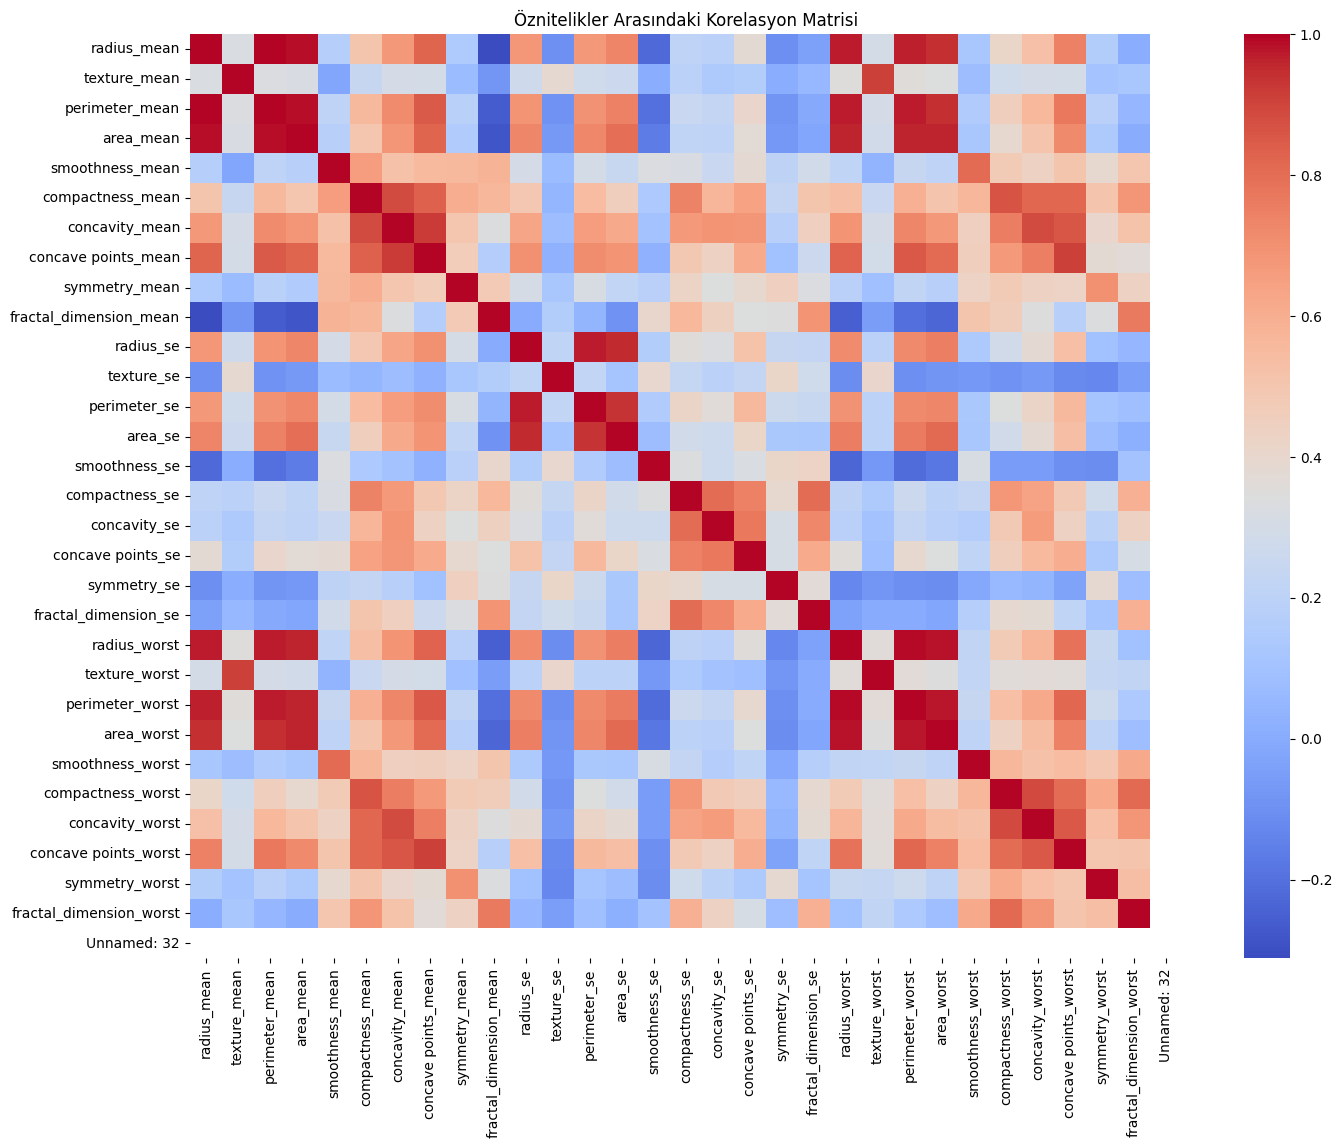

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Öznitelikler Arasındaki Korelasyon Matrisi')
plt.show()

In [13]:
print("\nEn yüksek korelasyonlu özellik çiftleri:")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # 0.8'den büyük korelasyon 
            corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


En yüksek korelasyonlu özellik çiftleri:


In [14]:
corr_pairs = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
for pair in corr_pairs[:10]:  # İlk 10 çift
    print(f"{pair[0]} ve {pair[1]}: {pair[2]:.4f}")


perimeter_mean ve radius_mean: 0.9979
perimeter_worst ve radius_worst: 0.9937
area_mean ve radius_mean: 0.9874
area_mean ve perimeter_mean: 0.9865
area_worst ve radius_worst: 0.9840
area_worst ve perimeter_worst: 0.9776
perimeter_se ve radius_se: 0.9728
perimeter_worst ve perimeter_mean: 0.9704
radius_worst ve radius_mean: 0.9695
radius_worst ve perimeter_mean: 0.9695


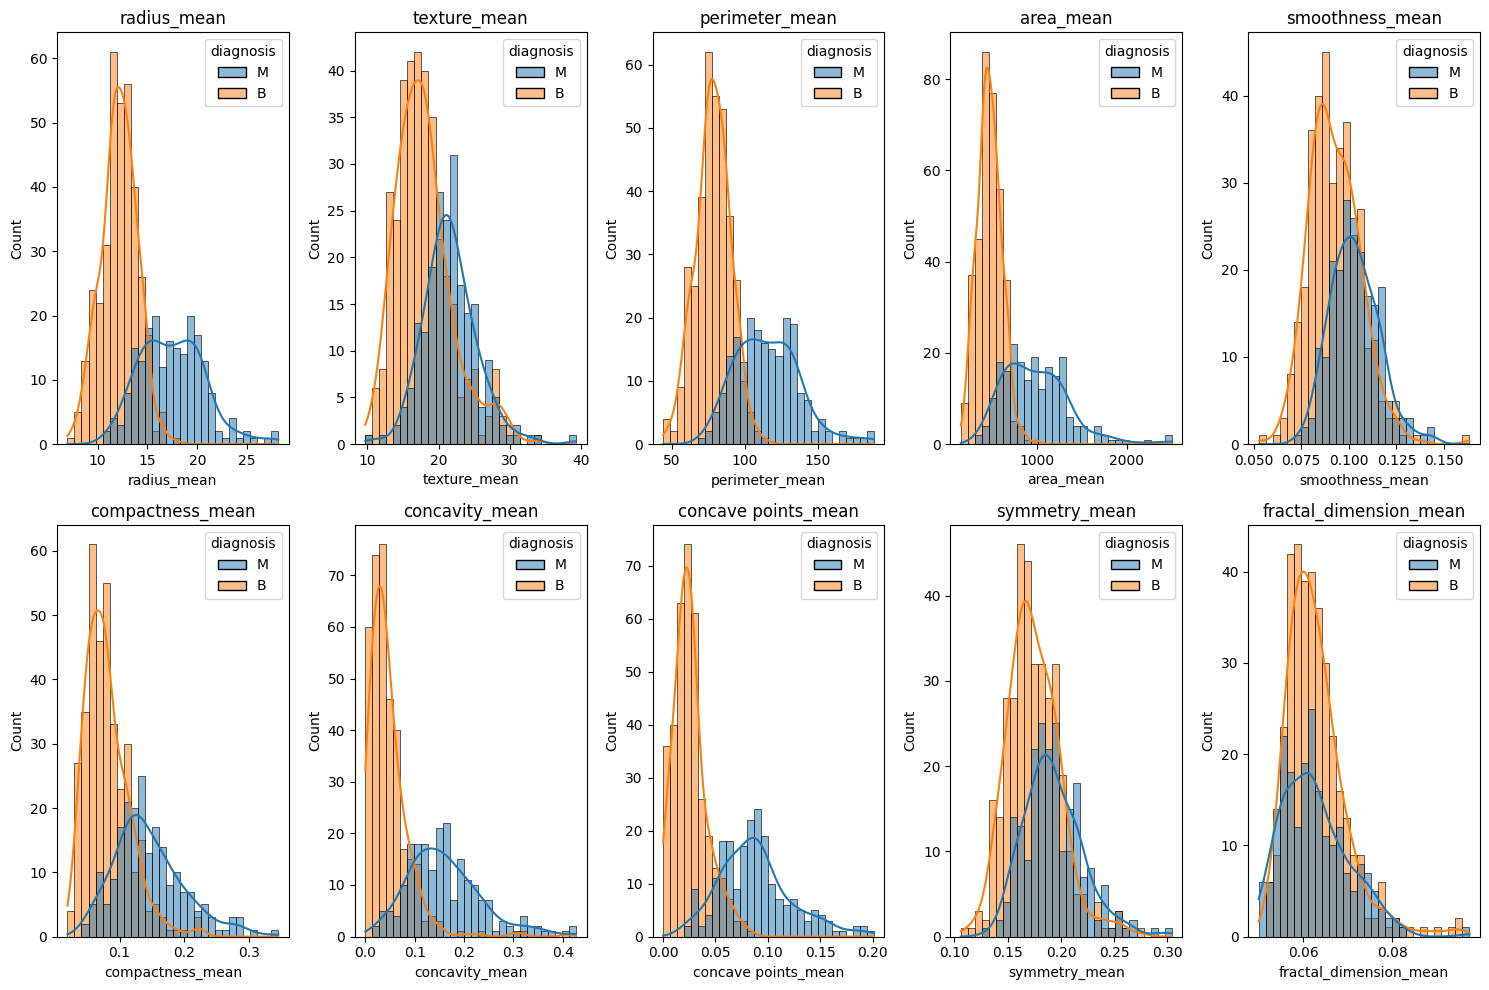

In [15]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_df.columns[:10]):  # İlk 10 öznitelik için
    plt.subplot(2, 5, i+1)
    sns.histplot(data=df, x=column, hue='diagnosis', kde=True, bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()

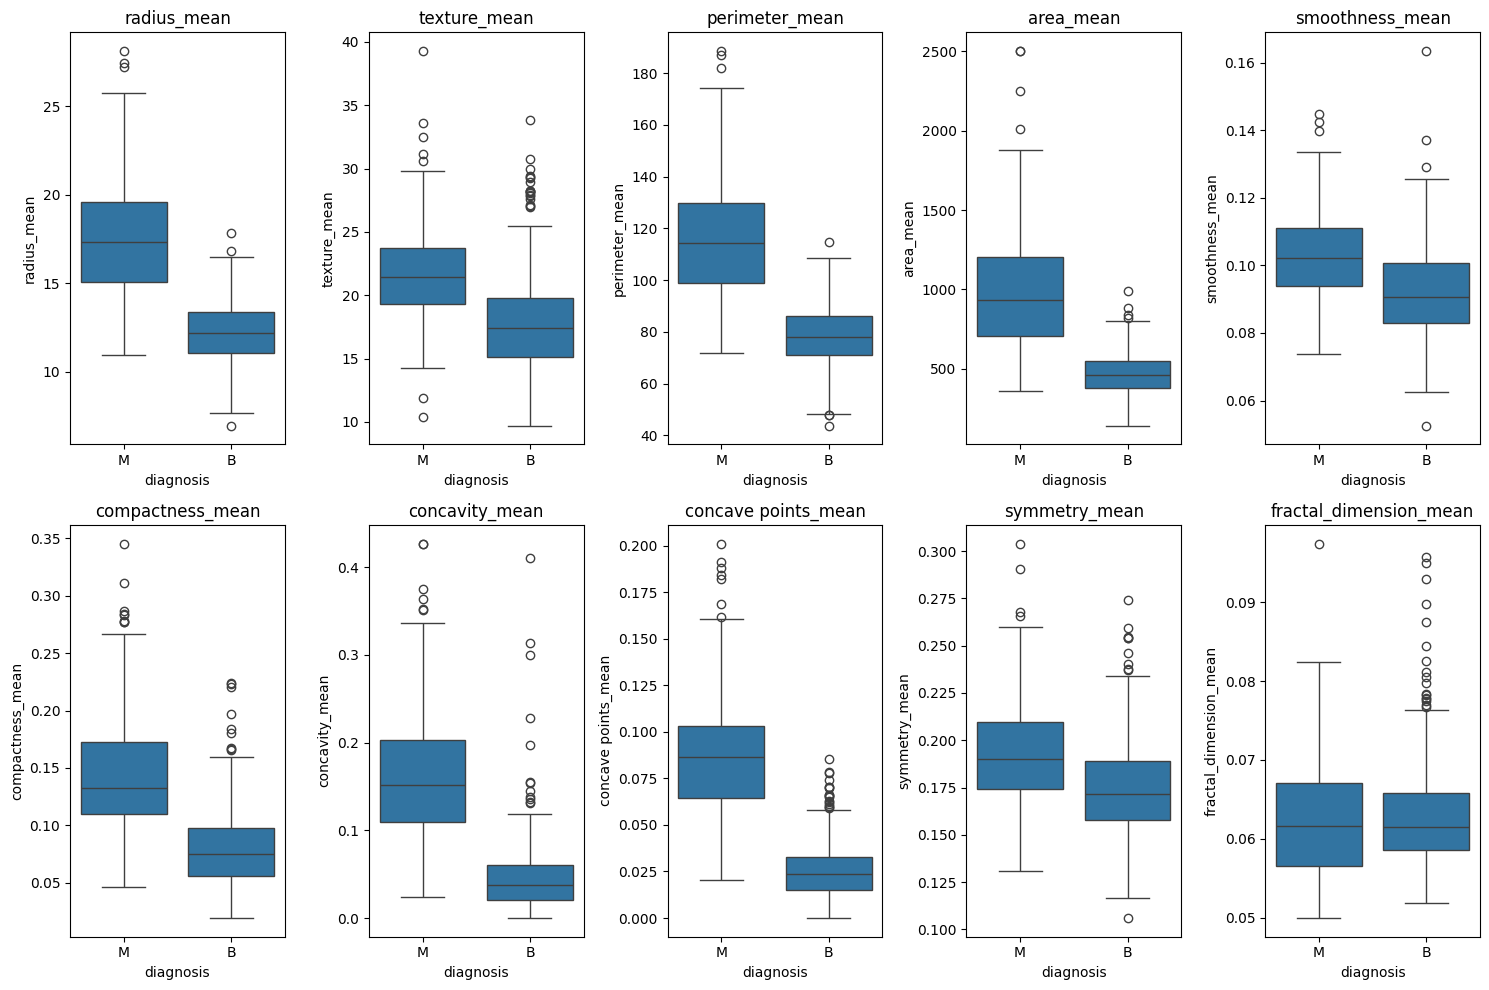

In [16]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_df.columns[:10]):  # İlk 10 öznitelik için 
    plt.subplot(2, 5, i+1)
    sns.boxplot(x='diagnosis', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

In [22]:
X = df.drop(['id', 'diagnosis','Unnamed: 32'], axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [23]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
feature_names = X.columns

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (426, 30)
Test seti boyutu: (143, 30)


In [28]:
models = {
    'Lojistik Regresyon': LogisticRegression(max_iter=1000, random_state=42),
    'Destek Vektör Makinesi': SVC(probability=True, random_state=42),
    'Rastgele Orman': RandomForestClassifier(random_state=42)
}

results = {}

In [29]:
for name, model in models.items():
    # Modeli eğitelim
    model.fit(X_train_scaled, y_train)
    
    # Test seti üzerinde tahmin yapalım
    y_pred = model.predict(X_test_scaled)
    
    # Doğruluk skorunu hesaplayalım
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Sınıflandırma raporunu yazdıralım
    print(f"\n{name} Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))


Lojistik Regresyon Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143


Destek Vektör Makinesi Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143


Rastgele Orman Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
  

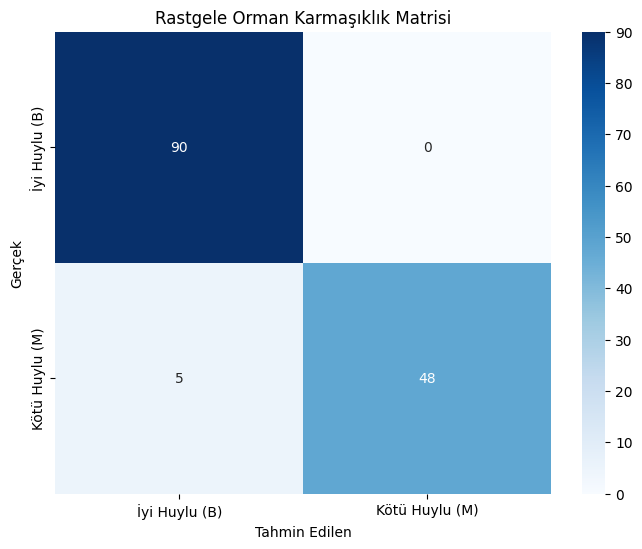

In [33]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
   xticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'],
               yticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'])
plt.title(f'{name} Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

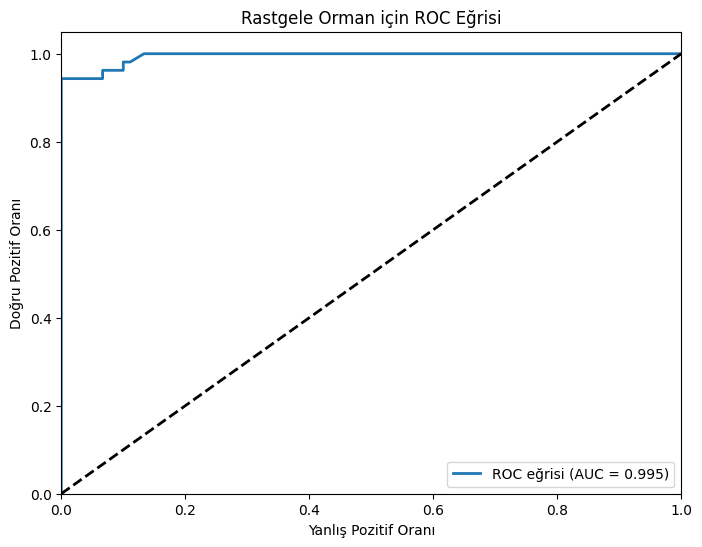

In [34]:
if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, lw=2, label=f'ROC eğrisi (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Yanlış Pozitif Oranı')
        plt.ylabel('Doğru Pozitif Oranı')
        plt.title(f'{name} için ROC Eğrisi')
        plt.legend(loc="lower right")
        plt.show()

(0.85, 1.0)

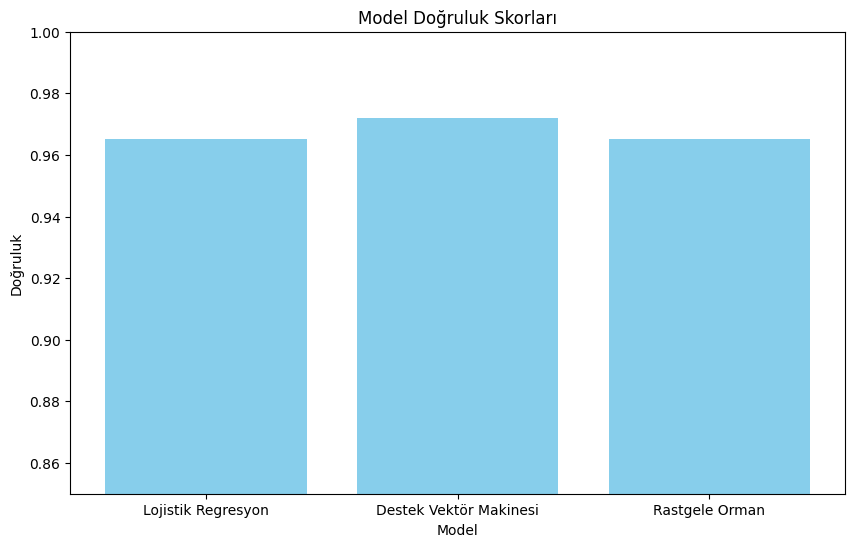

In [35]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Doğruluk Skorları')
plt.xlabel('Model')
plt.ylabel('Doğruluk')
plt.ylim(0.85, 1.0)


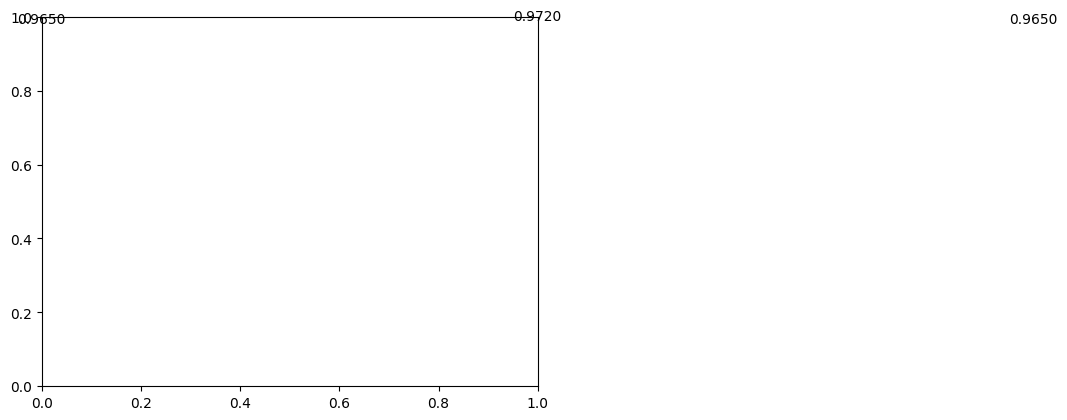

In [36]:
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+0.01,
            f'{height:.4f}', ha='center', va='bottom')
plt.show()

In [37]:
best_model = RandomForestClassifier(random_state=42)

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [41]:
print("\nEn iyi parametreler:")
print(grid_search.best_params_)
print("En iyi çapraz doğrulama skoru: {:.4f}".format(grid_search.best_score_))


En iyi parametreler:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
En iyi çapraz doğrulama skoru: 0.9648


In [42]:
best_rf = grid_search.best_estimator_

In [43]:
y_pred_best = best_rf.predict(X_test_scaled)
print("\nEn iyi model test skoru: {:.4f}".format(accuracy_score(y_test, y_pred_best)))


En iyi model test skoru: 0.9650


In [44]:
print("\nEn İyi Model Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_best))


En İyi Model Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



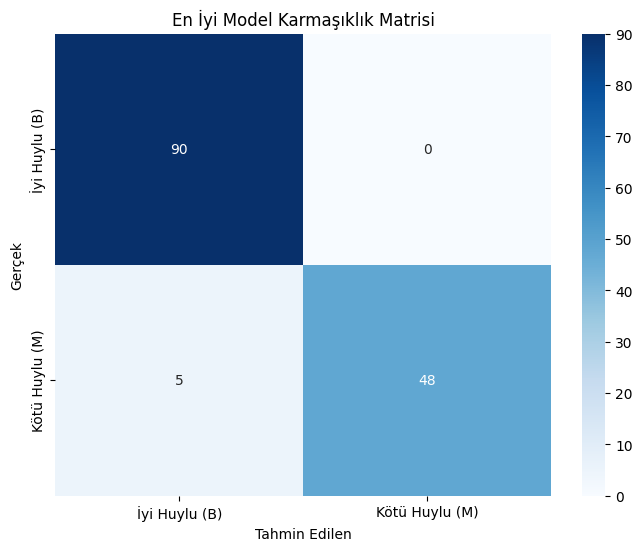

In [45]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'],
            yticklabels=['İyi Huylu (B)', 'Kötü Huylu (M)'])
plt.title('En İyi Model Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

In [46]:
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

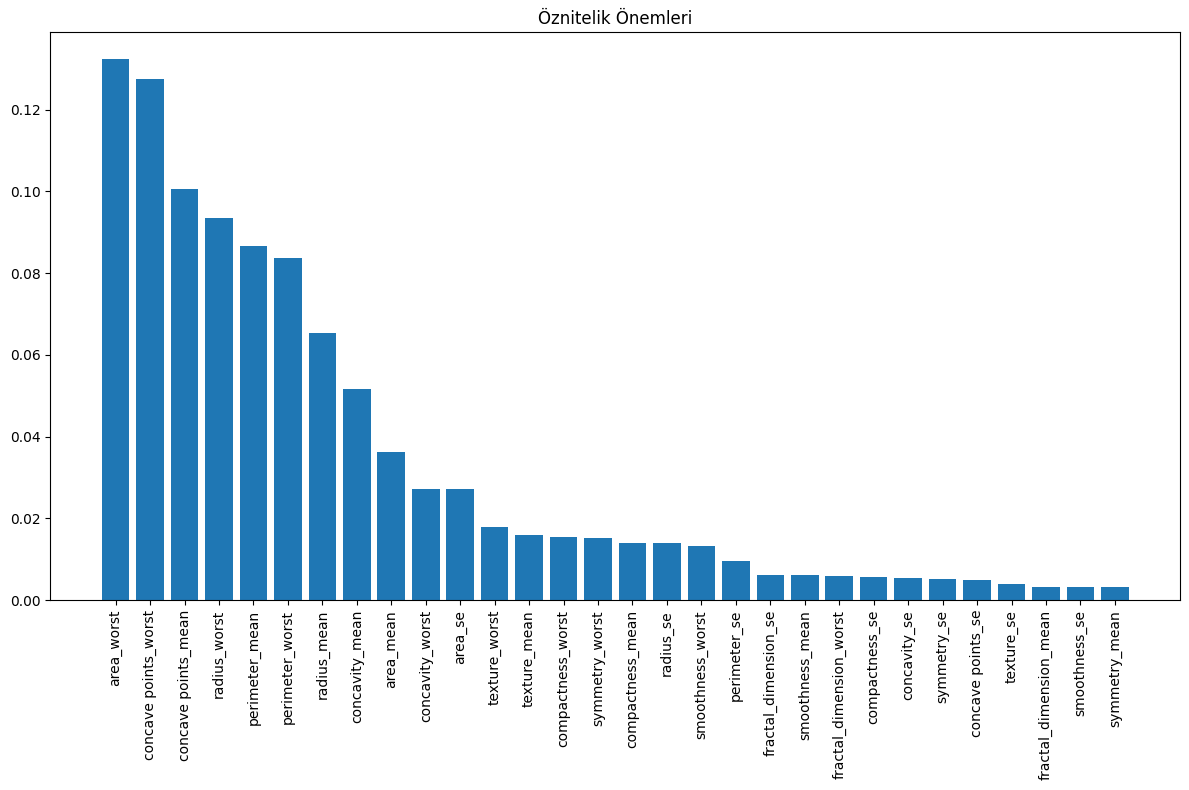

In [47]:
plt.figure(figsize=(12, 8))
plt.title('Öznitelik Önemleri')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [48]:
print("\nEn önemli 10 öznitelik:")
for i in range(10):
    print(f"{i+1}. {feature_names[indices[i]]}: {feature_importances[indices[i]]:.4f}")



En önemli 10 öznitelik:
1. area_worst: 0.1323
2. concave points_worst: 0.1276
3. concave points_mean: 0.1007
4. radius_worst: 0.0935
5. perimeter_mean: 0.0867
6. perimeter_worst: 0.0837
7. radius_mean: 0.0653
8. concavity_mean: 0.0516
9. area_mean: 0.0362
10. concavity_worst: 0.0273


In [49]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [50]:
print("\nEn iyi model 'best_model.pkl' olarak kaydedildi.")



En iyi model 'best_model.pkl' olarak kaydedildi.


In [51]:
sample = X_test.iloc[0].values.reshape(1, -1)
sample_scaled = scaler.transform(sample)
prediction = best_rf.predict(sample_scaled)
prediction_prob = best_rf.predict_proba(sample_scaled)

c:\Users\sedtt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
print("\nÖrnek veri tahmini:")
print(f"Gerçek değer: {'Kötü Huylu (M)' if y_test.iloc[0] == 1 else 'İyi Huylu (B)'}")
print(f"Tahmin edilen: {'Kötü Huylu (M)' if prediction[0] == 1 else 'İyi Huylu (B)'}")
print(f"Olasılık: Kötü Huylu (M) olma olasılığı: {prediction_prob[0][1]:.4f}, İyi Huylu (B) olma olasılığı: {prediction_prob[0][0]:.4f}")



Örnek veri tahmini:
Gerçek değer: Kötü Huylu (M)
Tahmin edilen: Kötü Huylu (M)
Olasılık: Kötü Huylu (M) olma olasılığı: 0.9700, İyi Huylu (B) olma olasılığı: 0.0300


In [53]:
print("\nProje Özeti:")
print("Bu projede, meme kanseri veri setini kullanarak bir sınıflandırma modeli geliştirdik.")
print("Modelin amacı, hücre özelliklerine dayanarak tümörün iyi huylu mu yoksa kötü huylu mu olduğunu tahmin etmektir.")
print(f"En iyi modelimiz {max(results, key=results.get)} oldu ve {max(results.values()):.4f} doğruluk skoru elde ettik.")
print("Grid Search sonrası en iyi hiperparametreler ile Rastgele Orman modelini optimize ettik.")
print(f"Optimize edilmiş modelin test doğruluğu: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nBu tür modeller, doktorların erken teşhis koymasına yardımcı olabilir ve tedavi sürecini hızlandırabilir.")


Proje Özeti:
Bu projede, meme kanseri veri setini kullanarak bir sınıflandırma modeli geliştirdik.
Modelin amacı, hücre özelliklerine dayanarak tümörün iyi huylu mu yoksa kötü huylu mu olduğunu tahmin etmektir.
En iyi modelimiz Destek Vektör Makinesi oldu ve 0.9720 doğruluk skoru elde ettik.
Grid Search sonrası en iyi hiperparametreler ile Rastgele Orman modelini optimize ettik.
Optimize edilmiş modelin test doğruluğu: 0.9650

Bu tür modeller, doktorların erken teşhis koymasına yardımcı olabilir ve tedavi sürecini hızlandırabilir.
